In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

First, I'll define a function that given a data point and given cluster centers it assigns the data point to the closest cluster center using squared Euclidean distance.

In [2]:
def cluster_assign(data_point, cluster_centers):
    distances = []
    for i in cluster_centers:
        dist = math.pow(np.linalg.norm(data_point-i),2)
        distances.append(dist)
    return distances.index(min(distances))

Next, I'll define a function that runs one iteration of K-means. It takes in data points (pixels), K cluster centers, and the initial location of the clusters. It uses the cluster_assign function above to assign each data point to a cluster, and then it recomputes the cluster centers by taking the average location of the newly assigned data points.

In [3]:
def kmeans_one_iteration(pixels,K,clusters):
    cluster_assignments = np.apply_along_axis(cluster_assign, 1, pixels, cluster_centers=clusters)
    new_clusters = np.empty((0,3), int)
    for i in range(0,K):
        points_in_cluster = pixels[np.where(cluster_assignments==i)[0],:]
        if len(points_in_cluster) != 0:
            new_cluster_center1 = sum(points_in_cluster[:,0])/len(points_in_cluster)
            new_cluster_center2 = sum(points_in_cluster[:,1])/len(points_in_cluster)
            new_cluster_center3 = sum(points_in_cluster[:,2])/len(points_in_cluster)
            new_cluster_center = [new_cluster_center1, new_cluster_center2, new_cluster_center3]
            new_clusters = np.append(new_clusters, np.array([new_cluster_center]), axis=0)
        else:
            new_clusters = np.append(new_clusters, np.array([clusters[i]]), axis=0)

    return cluster_assignments, new_clusters

In [11]:
# Read in an image and set K to 3
image_name = 'fractals.jpg'
K = 3

In [12]:
# Formatting the image to feed it to the function
image = plt.imread(image_name)
rows = image.shape[0]
cols = image.shape[1]
pixels = np.zeros((rows*cols,3))
for i in range(rows):
    for j in range(cols):
        pixels[j*rows+i,:] = image[i,j,:]

In [8]:
# Initializing K random clusters
clusters = np.empty((0,3), int)
for i in range(0,K):
    col1 = random.randrange(0, 255)
    col2 = random.randrange(0, 255)
    col3 = random.randrange(0, 255)
    clusters = np.append(clusters, np.array([[col1,col2,col3]]), axis=0)

# Run first iteration of K-means
cluster_assignments, new_clusters  = kmeans_one_iteration(pixels,K,clusters)

# Setting a magic number as a signal for when the cluster centers stop moving
magic_number = 1
while np.linalg.norm(clusters-new_clusters) > magic_number:
    centroids_move = np.linalg.norm(clusters-new_clusters)
    clusters = new_clusters
    cluster_assignments,  new_clusters= kmeans_one_iteration(pixels,K,clusters)

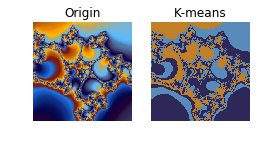

In [10]:
# Print the orginal image next to the clustered image

converted_image1 = np.zeros((rows, cols, 3))
for i in range(rows):
        for j in range(cols):
            converted_image1[i,j,:] = new_clusters[cluster_assignments[j*rows+i],:]
converted_image1 /= 255

plt.subplot(1,3,1)
plt.title('Origin')
plt.imshow(image)
plt.axis('off')

plt.subplot(1,3,2)
plt.title('K-means')
plt.imshow(converted_image1)
plt.axis('off')

plt.show()